In [2]:
# https://www.ohmsha.co.jp/book/9784274226984/
%config IPCompleter.greedy=True
import sys
import numpy as np
import scipy as sp
import scipy.stats
import sympy as symp
import itertools
import matplotlib.pyplot as plt

In [3]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [7]:
dt = 10**-8
t1 = 0
t2 = 0
c = 0
for i in range(10000):
    t1 += dt
    c += 1
    t2 = dt * c
t1, t2

(9.999999999998701e-05, 0.0001)

In [8]:
# equation
a = np.float32(1000.)
b = np.float32(10**-8)
## formula
x1 = (2*a + np.sqrt((2*a)**2 - 4*(a**2-b)))/2
x2 = (2*a + np.sqrt( ((2*a)**2 - 4*(a**2)) + 4*b))/2
x3 = a + np.sqrt(b)
x1, x2, x3

(1000.0001000585712, 1000.0000999999997, 1000.0001)

In [18]:
np.roots([1.0, -2*a, a**2-b])

array([1000.00010006,  999.99989994])

In [26]:
# newton's method
def newton_method(f, df, x0, eps):
    for i in range(100):
        x = x0 - f(x0)/df(x0)
        if abs(x - x0) < eps: break
        x0 = x
    return x0, f"{i} iterations"

def f(x):
    return x * x - 9.0
def derivative_f(x):
    return 2.0*x

eps = 1.e-4
x0 = 1.0
newton_method(f, derivative_f, x0, eps)

(3.00009155413138, '4 iterations')

In [27]:
# sympy
X = symp.Symbol('X')
expr = 3 * symp.atan(X-1) + X/4
symp.diff(expr, X)

1/4 + 3/((X - 1)**2 + 1)

In [28]:
def f(x):
    return 3*np.arctan(x-1)+x/4
def derivative_f(x):
    return 1/4 + 3/( (x-1)**2 + 1 )

eps = 1.e-4
x0 = 2.5
newton_method(f, derivative_f, x0, eps)

(0.922984253294827, '6 iterations')

In [30]:
eps = 1.e-4
x0 = 3.0
newton_method(f, derivative_f, x0, eps)

(16.86288260493808, '99 iterations')

Text(0, 0.5, 'f(x)')

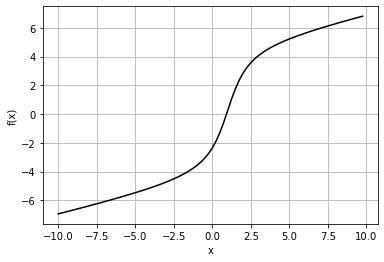

In [36]:
xx = np.arange(-10, 10, 0.25)
yy = f(xx)
plt.plot(xx, yy, c='k')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')

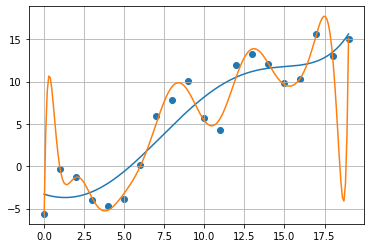

In [38]:
# interpolation (curve fitting)
num = 20
x = np.arange(0,num,1)
y = 1.2*x + sp.stats.uniform(loc=-10.0, scale=10.0).rvs(num)

p5 = np.polyfit(x, y, deg=5)
p15 = np.polyfit(x, y, deg=15)
xx = np.linspace(np.min(x), np.max(x), 200)
y5 = np.polyval(p5, xx)
y15 = np.polyval(p15, xx)

plt.grid()
plt.scatter(x, y)
plt.plot(xx, y5)
plt.plot(xx, y15)

In [40]:
# ordinal differencial equation
from scipy.integrate import solve_ivp

def dFunc(time, x, mass, damper, spring, u):
    dx0=x[1]
    dx1=(-1/mass)*(damper*x[1] + spring*x[0] - u)
    return [dx0, dx1]

x0=[0.0, 1.0]
u = 1.0
mass, damper, spring = 4.0, 1.0, 1.0
T_END=20

sol = solve_ivp(fun=dFunc, t_span=[0, T_END], y0=x0, method='RK45', args=[mass, damper, spring, u], dense_output=True)
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 116
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x00000191F69B6400>
   status: 0
  success: True
        t: array([0.00000000e+00, 9.99000999e-04, 1.09890110e-02, 1.10889111e-01,
       1.10989011e+00, 2.88965259e+00, 4.57487351e+00, 6.26009443e+00,
       8.46920664e+00, 1.03213591e+01, 1.21735115e+01, 1.41138898e+01,
       1.60847723e+01, 1.78335397e+01, 1.95507896e+01, 2.00000000e+01])
 t_events: None
        y: array([[ 0.00000000e+00,  9.99000957e-04,  1.09889557e-02,
         1.10832697e-01,  1.05745241e+00,  2.12143438e+00,
         2.15435480e+00,  1.54575163e+00,  6.86780435e-01,
         4.46340373e-01,  6.48789703e-01,  1.01555465e+00,
         1.23179105e+00,  1.21332173e+00,  1.08023734e+00,
         1.04148805e+00],
       [ 1.00000000e+00,  9.99999875e-01,  9.99984919e-01,
         9.98477446e-01,  8.62827891e-01,  2.96399863e-01,
    

In [9]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html
np.random.uniform(0, 1, 10)

array([0.79660125, 0.85797793, 0.80347166, 0.08109138, 0.48913998,
       0.85912649, 0.83705714, 0.7281896 , 0.38920131, 0.77512637])

In [10]:
def box_muller():
    u1 = np.random.uniform(0, 1)
    u2 = np.random.uniform(0, 1)
    z1 = np.sqrt(-np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-np.log(u1)) * np.sin(2 * np.pi * u2)
    return [z1, z2]

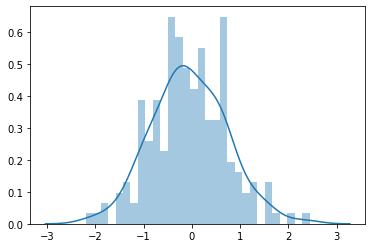

In [14]:
import seaborn as sns
normals = itertools.chain.from_iterable([box_muller() for i in range(100)])
normals = list(normals)
sns.distplot(normals, bins = 30)

In [31]:
# probability distribution
n = 3
k = np.arange(0, n+1)
sp.stats.binom.pmf(k, n, p=0.375) # probability mass function

array([0.24414062, 0.43945312, 0.26367187, 0.05273438])

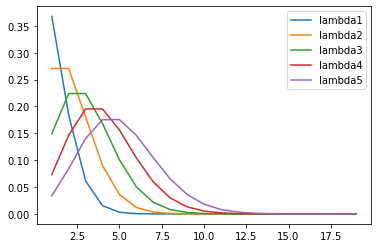

In [37]:
x = np.arange(1, 20, 1.0)
for l in range(1, 6): # lambda
    pmf = sp.stats.poisson.pmf(x, l)
    plt.plot(x, pmf, label = f"lambda{l}")
plt.legend()